In [1]:
# Importar o dataset "ansiedade" para o Python (se você usar o pd.read_csv, o resultado já será um DataFrame do Pandas)
# Mostrar as primeiras linhas na tela

import pandas as pd

dados = pd.read_csv("C:/Users/20221enpro0200/Downloads/ansiedade.csv", sep = ",", decimal = ".")
dados.head()

,idade,horas_de_sono,at_fisica_h_semana,cafeina_mg_dia,consumo_alcool_drinks_semana,nivel_stress,batimentos_minuto,taxa_respiracao,nivel_suor,sessoes_terapia_mes,qualidade_dieta,nivel_ansiedade
0,29,6.0,2.7,181,10,10,114,14,4,3,7,5
1,46,6.2,5.7,200,8,1,62,23,2,2,8,3
2,64,5.0,3.7,117,4,1,91,28,3,1,1,1
3,20,5.8,2.8,360,6,4,86,17,3,0,1,2
4,49,8.2,2.3,247,4,1,98,19,4,1,3,1


In [2]:
# Verificar se existem valores faltantes. Se houver, tomar uma decisão sobre o que fazer e implementar esta decisão.

print(dados.isnull().sum())

idade                           0
horas_de_sono                   0
at_fisica_h_semana              0
cafeina_mg_dia                  0
consumo_alcool_drinks_semana    0
nivel_stress                    0
batimentos_minuto               0
taxa_respiracao                 0
nivel_suor                      0
sessoes_terapia_mes             0
qualidade_dieta                 0
nivel_ansiedade                 0
dtype: int64


In [3]:
# Fazer a matriz de correlações
atributos_selecionados = ["idade", "horas_de_sono", "at_fisica_h_semana", "cafeina_mg_dia", "consumo_alcool_drinks_semana", "nivel_stress", 
                          "batimentos_minuto", "taxa_respiracao", "nivel_suor", "sessoes_terapia_mes", "qualidade_dieta", "nivel_ansiedade"]
X = dados[atributos_selecionados]

matriz_correlacoes = X.corr()
print(matriz_correlacoes["nivel_ansiedade"])

idade                          -0.074316
horas_de_sono                  -0.493836
at_fisica_h_semana             -0.243187
cafeina_mg_dia                  0.350651
consumo_alcool_drinks_semana    0.100626
nivel_stress                    0.667939
batimentos_minuto               0.188900
taxa_respiracao                 0.157048
nivel_suor                      0.160074
sessoes_terapia_mes             0.517606
qualidade_dieta                -0.220245
nivel_ansiedade                 1.000000
Name: nivel_ansiedade, dtype: float64


Text(0.5, 1.0, 'Matriz de correlações')

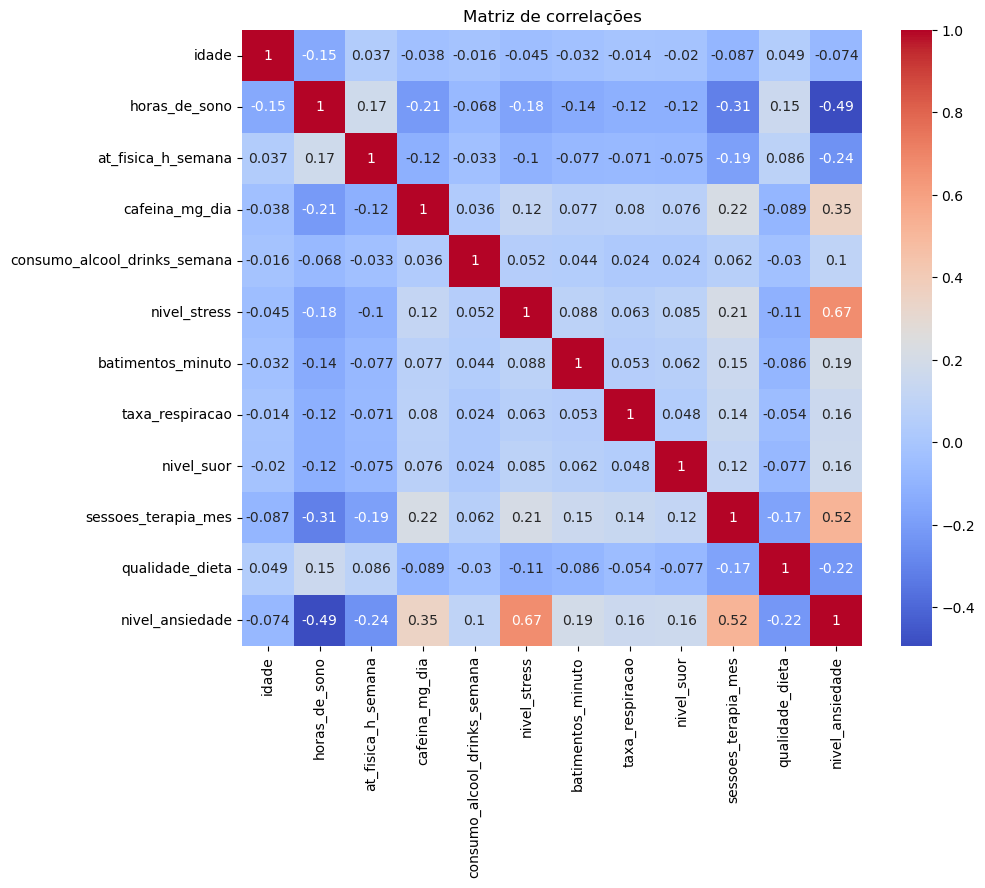

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(X.corr(), annot = True, cmap = 'coolwarm')
plt.title('Matriz de correlações')

In [5]:
atributos_selecionados_2 = ['nivel_stress', 'sessoes_terapia_mes', 'horas_de_sono', 'cafeina_mg_dia', 'at_fisica_h_semana']

X = dados[atributos_selecionados_2]
Y = dados['nivel_ansiedade']

print(X)

       nivel_stress  sessoes_terapia_mes  horas_de_sono  cafeina_mg_dia  \
0                10                    3            6.0             181   
1                 1                    2            6.2             200   
2                 1                    1            5.0             117   
3                 4                    0            5.8             360   
4                 1                    1            8.2             247   
...             ...                  ...            ...             ...   
10995             8                    1            6.1             566   
10996             7                    2            6.6              64   
10997             8                    2            6.7             159   
10998             4                    1            5.7             248   
10999             1                    2            6.1             205   

       at_fisica_h_semana  
0                     2.7  
1                     5.7  
2              

In [6]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

X_padronizado = padronizador.fit_transform(X)

print(X_padronizado)

[[ 1.41562653  0.26210725 -0.53011464 -0.72572672 -0.1324784 ]
 [-1.65912175 -0.1959766  -0.36717564 -0.59451721  1.50889088]
 [-1.65912175 -0.65406046 -1.34480966 -1.1676956   0.4146447 ]
 ...
 [ 0.73234914 -0.1959766   0.04017187 -0.87765352  2.16543859]
 [-0.63420565 -0.65406046 -0.77452315 -0.26304054 -0.1324784 ]
 [-1.65912175 -0.1959766  -0.44864514 -0.55998839 -1.00787534]]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Separação dos dados em treino e teste

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_padronizado, Y, test_size = 0.2, random_state = 42)

# Inicialização e ajuste do modelo

modelo = LinearRegression()
modelo.fit(X_treino, Y_treino)

# Predições na amostra teste

y_pred = modelo.predict(X_teste)

print("Erro médio percentual absoluto (MAPE):{:.4f}".format(mean_absolute_percentage_error(Y_teste, y_pred)))
print("R²:{:.4f}".format(r2_score(Y_teste, y_pred)))

Erro médio percentual absoluto (MAPE):0.3234
R²:0.7144


In [ ]:
# Erro médio percentual absoluto (MAPE):0.3234 > os dados previstos estão com um erro baixo com relação aos dados reais
# R²:0.7144 > a reta do modelo se ajusta bem aos dados reais 